Задача


Используя данные о хоккеистах (скачать можно здесь), проверьте, является ли среди хоккеистов из Финляндии, Норвегии и Дании значимым отличие: а) роста, б) BMI.

Указанные гипотезы можно проверить с помощью однофакторного дисперсионного анализа. Реализуем для этого готовую функцию.

In [2]:
import numpy as np
import pandas as pd

In [6]:
def anova(*ys: np.ndarray) -> float:
    """Функция возвращает значение F-статистики
    для дисперсионного анализа.
    """
    
    y = np.concatenate(ys)

    ss_b = sum((yi.mean() - y.mean()) ** 2 * yi.size for yi in ys)
    ss_w = sum(((yi - yi.mean()) ** 2).sum() for yi in ys)
    
    sigma_b = ss_b / (len(ys) - 1)
    sigma_w = ss_w / (y.size - len(ys))
    
    return sigma_b / sigma_w

In [8]:
df = pd.read_csv('C:/Users/ID/Documents/jupyter-notebook/TV/hockey_players.csv')

df.head(5)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [9]:
df['country'].unique()

array(['RUS', 'AUT', 'BLR', 'CAN', 'CZE', 'FIN', 'GER', 'ITA', 'JPN',
       'LAT', 'NOR', 'SUI', 'SVK', 'SWE', 'UKR', 'USA', 'POL', 'SLO',
       'DEN', 'FRA', 'KAZ', 'HUN'], dtype=object)

In [10]:
countries = ['FIN', 'NOR', 'DEN']

Выборки из роста хоккеистов выбранных стран:


In [11]:
ys = [df.loc[df['country'] == country, 'height'] for country in countries]

F = anova(*ys)
F

3.59345750724064

Для построения критической области нам нужны квантили распределения Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$, где $k$ — число уровней, $n$ — общее число элементов во всех выборках.

In [12]:
k = len(countries)
n = sum(y.size for y in ys)

k1 = k - 1
k2 = n - k

k1, k2

(2, 430)

In [19]:
from scipy import stats

In [20]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.016700272452327

Итак, критическая область: $$\Omega_\alpha = \left( 3.017, \infty \right)$$

In [21]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

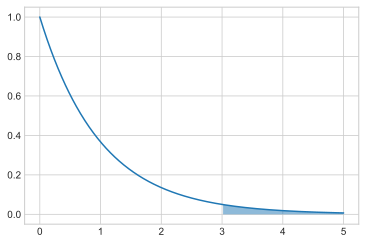

In [16]:
ox = np.linspace(0, 5, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 5, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

Поскольку статистика попала в критическую область, заключаем, что между ростами хоккеистов выбранных стран действительно есть значимое отличие.

Аналогично для BMI. Пересчитать нужно только F-статистику, поскольку остальные параметры такие же, как раньше.

In [22]:
ys = [df.loc[df['country'] == country, 'bmi'] for country in countries]

F = anova(*ys)
F

8.682513420531867

Разница между BMI хоккеистов также признаётся значимой.